<a href="https://colab.research.google.com/github/Ines-abb/Classification-Brain-Tumor/blob/main/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import zipfile
import scipy.stats as stats


In [8]:
# Download dataset
!wget https://cloud.utc.fr/index.php/s/ZyYcws37j8aR4Kz/download/fct_brain_tumor.zip

--2024-09-07 15:41:33--  https://cloud.utc.fr/index.php/s/ZyYcws37j8aR4Kz/download/fct_brain_tumor.zip
Resolving cloud.utc.fr (cloud.utc.fr)... 195.83.155.17
Connecting to cloud.utc.fr (cloud.utc.fr)|195.83.155.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘fct_brain_tumor.zip.1’

fct_brain_tumor.zip     [ <=>                ]   5.24K  --.-KB/s    in 0s      

2024-09-07 15:41:34 (78.2 MB/s) - ‘fct_brain_tumor.zip.1’ saved [5361]



In [9]:
# Unzip dataset
def unzip_data(filename):
    zip_ref = zipfile.ZipFile(filename, "r")
    zip_ref.extractall()
    zip_ref.close()



In [10]:
unzip_data("/content/fct_brain_tumor.zip")

In [11]:
brain_tumor = pd.read_csv("Brain Tumor.csv", sep=",")
brain_tumor.isnull().all()

,0
Image,False
Class,False
Mean,False
Variance,False
Standard Deviation,False
Entropy,False
Skewness,False
Kurtosis,False
Contrast,False
Energy,False


In [12]:

brain_tumor = brain_tumor.drop(columns='Image')
brain_tumor = brain_tumor.drop(columns='Class')

brain_tumor = brain_tumor.dropna()
brain_tumor

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [13]:
brain_tumor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mean                3762 non-null   float64
 1   Variance            3762 non-null   float64
 2   Standard Deviation  3762 non-null   float64
 3   Entropy             3762 non-null   float64
 4   Skewness            3762 non-null   float64
 5   Kurtosis            3762 non-null   float64
 6   Contrast            3762 non-null   float64
 7   Energy              3762 non-null   float64
 8   ASM                 3762 non-null   float64
 9   Homogeneity         3762 non-null   float64
 10  Dissimilarity       3762 non-null   float64
 11  Correlation         3762 non-null   float64
 12  Coarseness          3762 non-null   float64
dtypes: float64(13)
memory usage: 382.2 KB


In [14]:
brain_tumor_labels = pd.read_csv("Brain Tumor.csv", sep=",")
brain_tumor_labels = brain_tumor_labels.dropna()

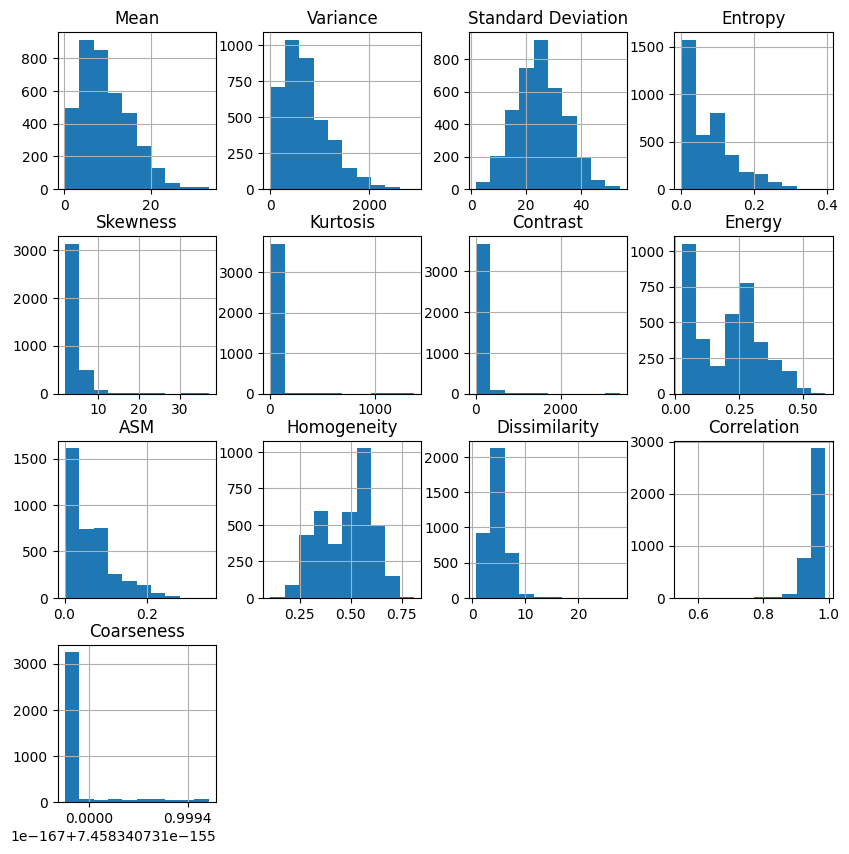

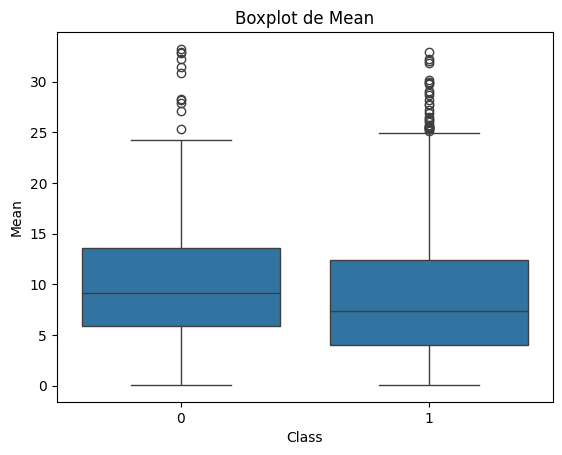

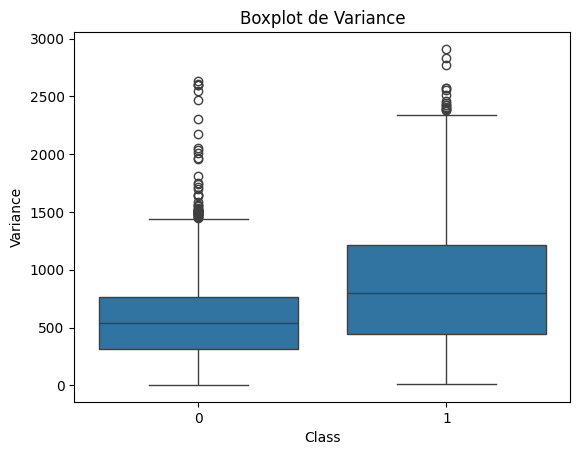

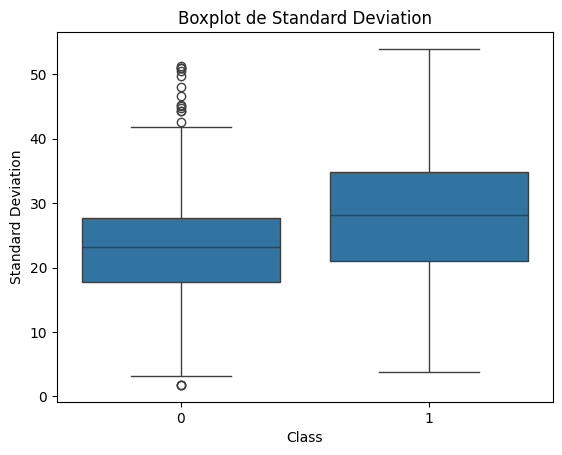

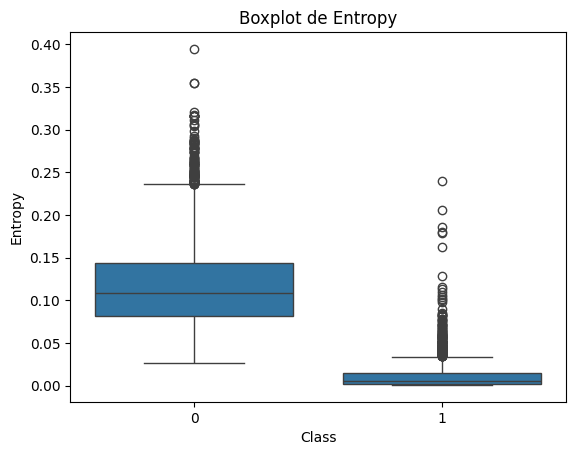

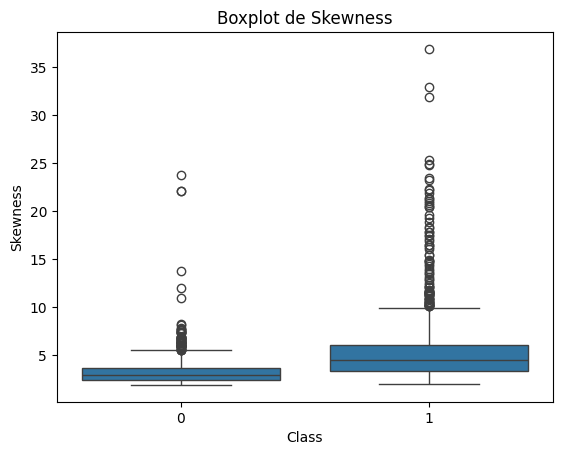

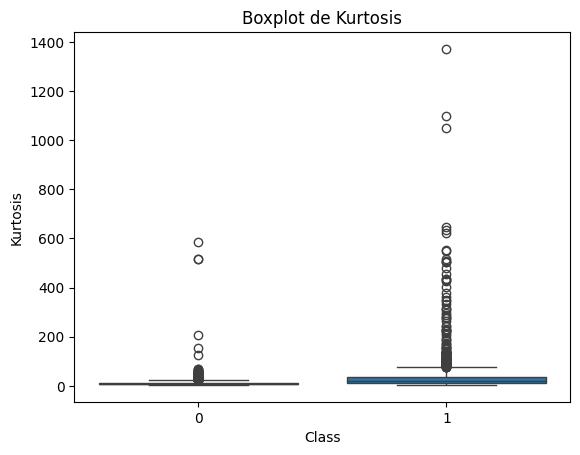

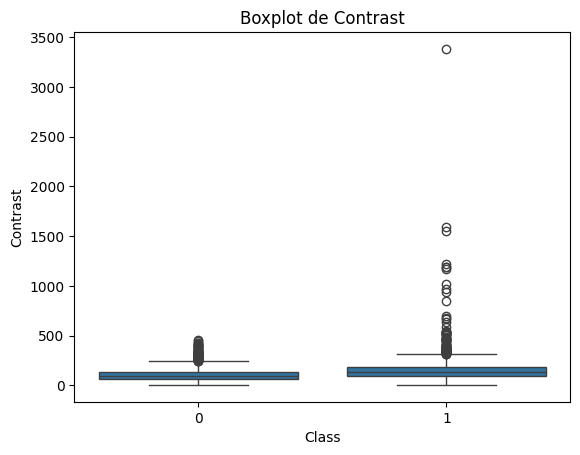

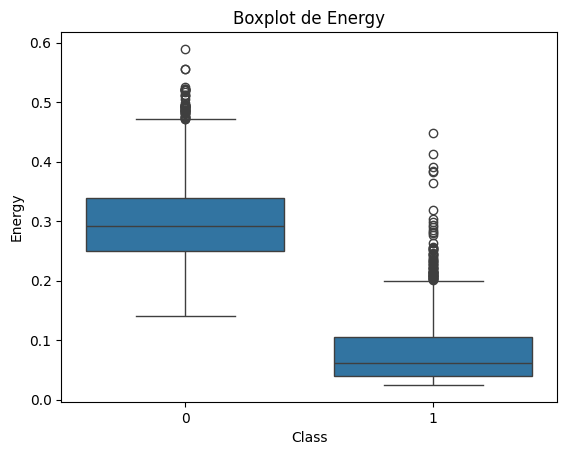

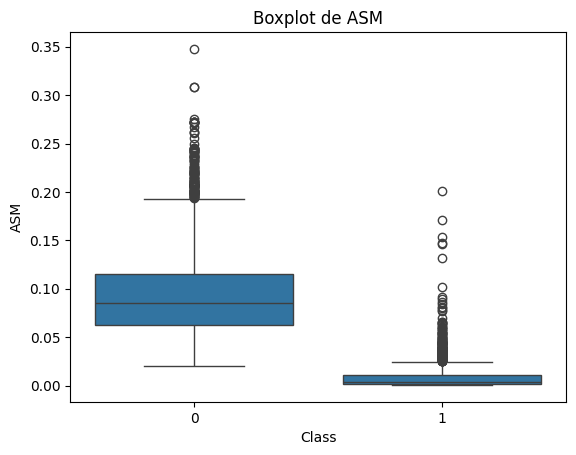

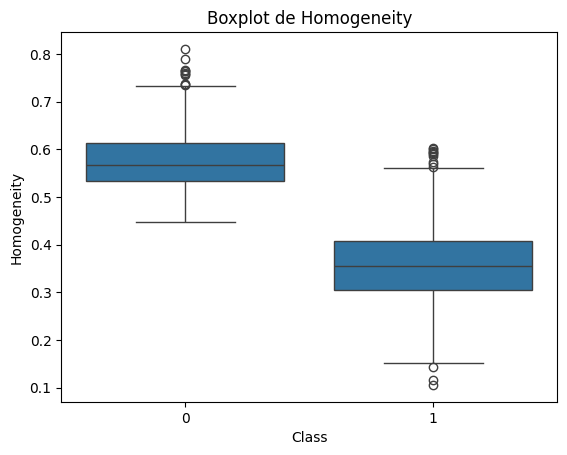

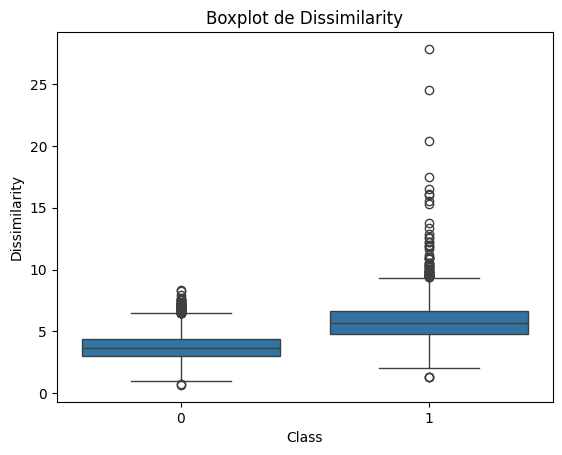

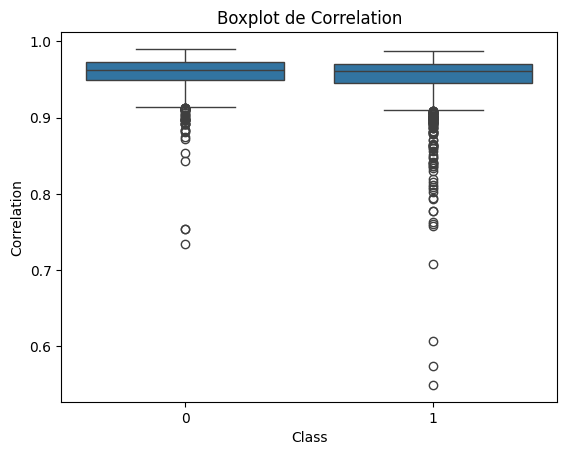

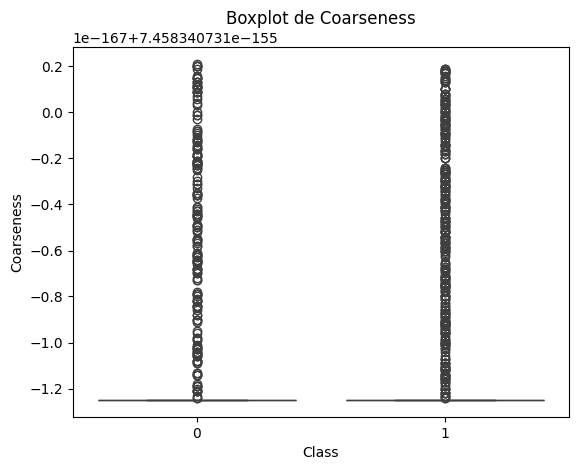

In [15]:
brain_tumor.hist(figsize=(10, 10))
plt.show()

for col in brain_tumor.columns:
    sns.boxplot(x='Class', y=col, data=brain_tumor_labels)
    plt.title(f'Boxplot de {col}')
    plt.show()

In [16]:
print(brain_tumor['Coarseness'].describe())
print(brain_tumor['Coarseness'].isnull().sum())
print(brain_tumor['Coarseness'].unique())

count     3.762000e+03
mean     7.458341e-155
std       0.000000e+00
min      7.458341e-155
25%      7.458341e-155
50%      7.458341e-155
75%      7.458341e-155
max      7.458341e-155
Name: Coarseness, dtype: float64
0
[7.45834073e-155 7.45834073e-155 7.45834073e-155 7.45834073e-155
 7.45834073e-155 7.45834073e-155 7.45834073e-155 7.45834073e-155
 7.45834073e-155 7.45834073e-155 7.45834073e-155 7.45834073e-155
 7.45834073e-155 7.45834073e-155 7.45834073e-155 7.45834073e-155
 7.45834073e-155 7.45834073e-155 7.45834073e-155 7.45834073e-155
 7.45834073e-155 7.45834073e-155 7.45834073e-155 7.45834073e-155
 7.45834073e-155 7.45834073e-155 7.45834073e-155 7.45834073e-155
 7.45834073e-155 7.45834073e-155 7.45834073e-155 7.45834073e-155
 7.45834073e-155 7.45834073e-155 7.45834073e-155 7.45834073e-155
 7.45834073e-155 7.45834073e-155 7.45834073e-155 7.45834073e-155
 7.45834073e-155 7.45834073e-155 7.45834073e-155 7.45834073e-155
 7.45834073e-155 7.45834073e-155 7.45834073e-155 7.45834073e-155
 

In [17]:
brain_tumor['Coarseness']

,Coarseness
0,7.458341e-155
1,7.458341e-155
2,7.458341e-155
3,7.458341e-155
4,7.458341e-155
...,...
3757,7.458341e-155
3758,7.458341e-155
3759,7.458341e-155
3760,7.458341e-155


In [18]:
brain_tumor = brain_tumor.drop(columns='Coarseness')

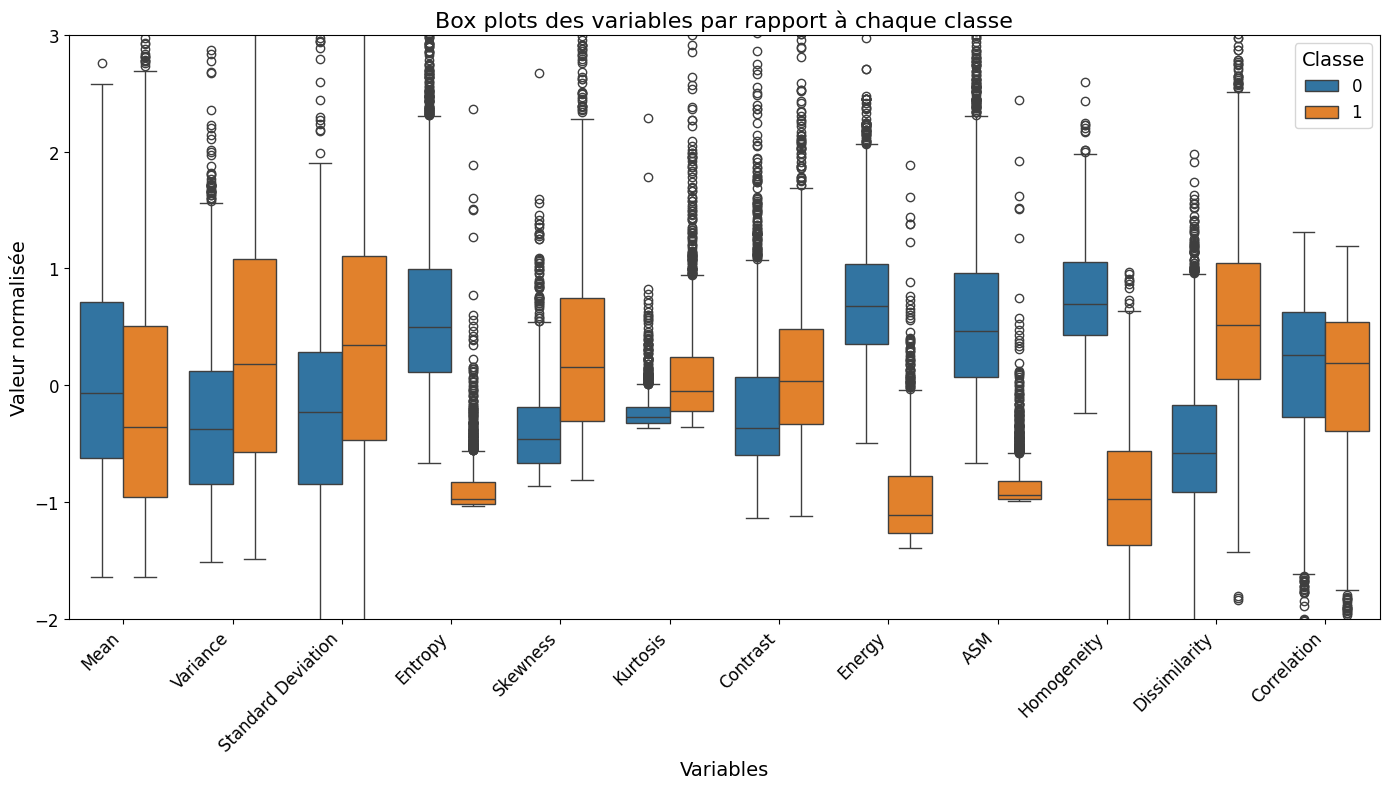

In [19]:
from sklearn.preprocessing import StandardScaler

X = brain_tumor_labels.drop(columns='Class')
X = X.drop(columns='Image')
X = X.drop(columns='Coarseness')

y = brain_tumor_labels['Class']

scaler = StandardScaler()

normalized_data = scaler.fit_transform(X)

normalized_df = pd.DataFrame(normalized_data, index=X.index, columns=X.columns)

normalized_df['Class'] = y.values

df_long = pd.melt(normalized_df, id_vars='Class', var_name='Variable', value_name='Valeur')

df_long['Class'] = df_long['Class'].astype(str)
df_long['Variable'] = df_long['Variable'].astype(str)

palette = {'0': 'blue', '1': 'orange'}

plt.figure(figsize=(14, 8))
sns.boxplot(x='Variable', y='Valeur', hue='Class', data=df_long)
plt.title('Box plots des variables par rapport à chaque classe', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Valeur normalisée', fontsize=14)
plt.ylim(-2, 3)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Classe', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()


In [20]:
var_names = []
u_stats = []
p_values = []

for var in brain_tumor:
    groups = [brain_tumor_labels[brain_tumor_labels['Class'] == 0][var], brain_tumor_labels[brain_tumor_labels['Class'] == 1][var]]
    u_stat, p = stats.mannwhitneyu(groups[0], groups[1])
    var_names.append(var)
    u_stats.append(u_stat)
    p_values.append(p)

results_df = pd.DataFrame({
    'Variable': var_names,
    'U-statistique': u_stats,
    'P-valeur': p_values
})

results_df.sort_values(by='P-valeur', inplace=True)

print(results_df)

              Variable  U-statistique       P-valeur
3              Entropy      3465311.0   0.000000e+00
7               Energy      3465075.0   0.000000e+00
8                  ASM      3465075.0   0.000000e+00
9          Homogeneity      3451948.0   0.000000e+00
10       Dissimilarity       508387.5  3.087405e-307
5             Kurtosis       688856.0  5.833636e-225
4             Skewness       719831.0  3.913232e-212
6             Contrast      1168189.0   6.079787e-69
1             Variance      1181733.0   7.481736e-66
2   Standard Deviation      1181733.0   7.481736e-66
0                 Mean      2026225.5   6.554054e-17
11         Correlation      1903947.0   3.111886e-06



Features de premier ordre :  mesures statistiques décrivant la distribution des intensités des pixels d'une image sans tenir compte des relations entre les pixels adjacents

- Moyenne (Mean) : La valeur moyenne des intensités des pixels de l'image.
- Variance : Mesure la dispersion des intensités des pixels autour de la moyenne.
- Écart Type (Standard Deviation) : La racine carrée de la variance, c'est aussi une mesure de la dispersion des intensités des pixels.
- Asymétrie (Skewness) : Décrit l'asymétrie de la distribution des intensités des pixels autour de la moyenne. Si positf -> plus de poids dans la queue du côté droit de la distribution (valeurs de pixels plus élevées).
- Kurtosis : Mesure le caractère "pointu" de la distribution des intensités des pixels. Un kurtosis élevé indique une distribution avec des queues plus lourdes et un pic plus aigu près de la moyenne.

Features de deuxième ordre : Relations entre les pixels adjacents

- Contraste (Contrast) : Mesure les variations locales dans les intensités des pixels, indiquant la clarté des changements de texture ou de couleur dans l'image.
- Énergie (Energy) : Représente la somme des carrés des éléments de la matrice de cooccurrence des niveaux de gris, fournissant une mesure de l'uniformité de l'image. Une énergie élevée indique une distribution plus homogène des valeurs des pixels.
- Moment angulaire du second ordre (ASM, Angular Second Moment) : Une autre mesure de l'uniformité des valeurs des pixels dans l'image, similaire à l'énergie.
- Entropie (Entropy) : Mesure la complexité ou le désordre dans la distribution des valeurs des pixels. Une entropie élevée indique une complexité plus grande, souvent associée à des textures riches et variées.
- Homogénéité (Homogeneity) : Indique à quel point les éléments de la matrice de cooccurrence sont proches de la diagonale de la matrice. Une valeur élevée signifie que les pixels voisins ont des valeurs similaires, indiquant une texture plus lisse.
- Dissimilarité (Dissimilarity) : Mesure les différences entre les paires de pixels voisins. Une valeur plus élevée indique une plus grande variation entre les pixels adjacents, associée à une texture plus rugueuse.
- Corrélation (Correlation) : Évalue à quel point les pixels liés à une matrice de cooccurrence sont corrélés les uns avec les autres sur l'image entière. Une corrélation élevée indique des relations linéaires fortes entre les valeurs de pixels voisins.
- Rugosité (Coarseness) : Une mesure qui évalue la rugosité perçue de la texture de l'image. Une valeur élevée suggère une texture grossière ou granuleuse.
- Class : (1 = Tumor, 0 = Non-Tumor)

<Axes: xlabel='Class', ylabel='count'>

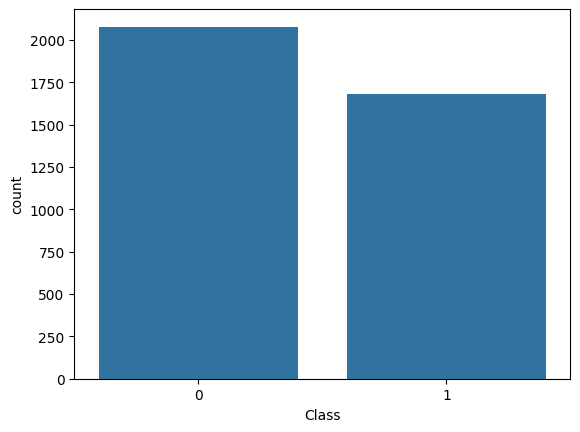

In [21]:
sns.countplot(x=brain_tumor_labels.Class, data=brain_tumor_labels)

Class 0: 55.26%
Class 1: 44.74%


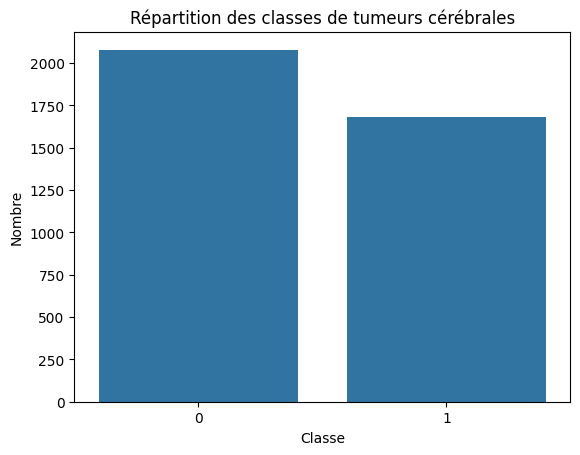

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

class_counts = brain_tumor_labels['Class'].value_counts()
class_percentages = class_counts / class_counts.sum() * 100

for cls, pct in class_percentages.items():
    print(f'Class {cls}: {pct:.2f}%')

sns.countplot(x='Class', data=brain_tumor_labels)
plt.title('Répartition des classes de tumeurs cérébrales')
plt.xlabel('Classe')
plt.ylabel('Nombre')
plt.show()


## La matrice de corrélation

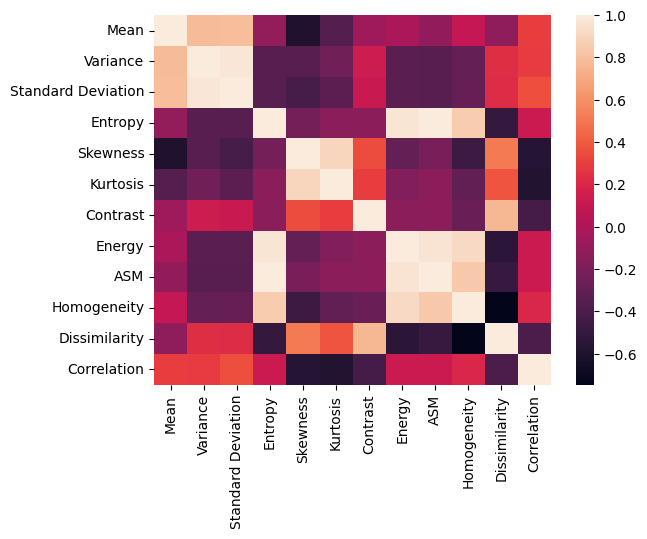

In [23]:
corr = brain_tumor.corr()

sns.heatmap(corr)
plt.show()

## On normalise les données en soustrayant à chaque colonne sa moyenne

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

normalized_data = scaler.fit_transform(brain_tumor)

# Convertir en DataFrame Pandas
normalized_df = pd.DataFrame(normalized_data, index=brain_tumor.index, columns=brain_tumor.columns)


## ACP

PC1: 40.88%
PC2: 31.30%
PC3: 12.87%
PC4: 6.26%
PC5: 4.78%
PC6: 2.00%
PC7: 1.08%
PC8: 0.33%
PC9: 0.26%
PC10: 0.14%
PC11: 0.09%
PC12: 0.00%


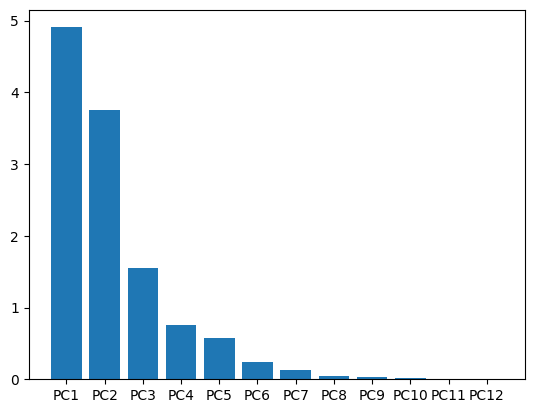

In [25]:
from sklearn.decomposition import PCA

cls = PCA(n_components=12)
pcs = cls.fit_transform(normalized_df)


variance_ratios = cls.explained_variance_ratio_
percentage_var_explained = variance_ratios * 100

plt.bar(["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12"],cls.explained_variance_)

for i, variance_explained in enumerate(percentage_var_explained, start=1):
    print(f"PC{i}: {variance_explained:.2f}%")

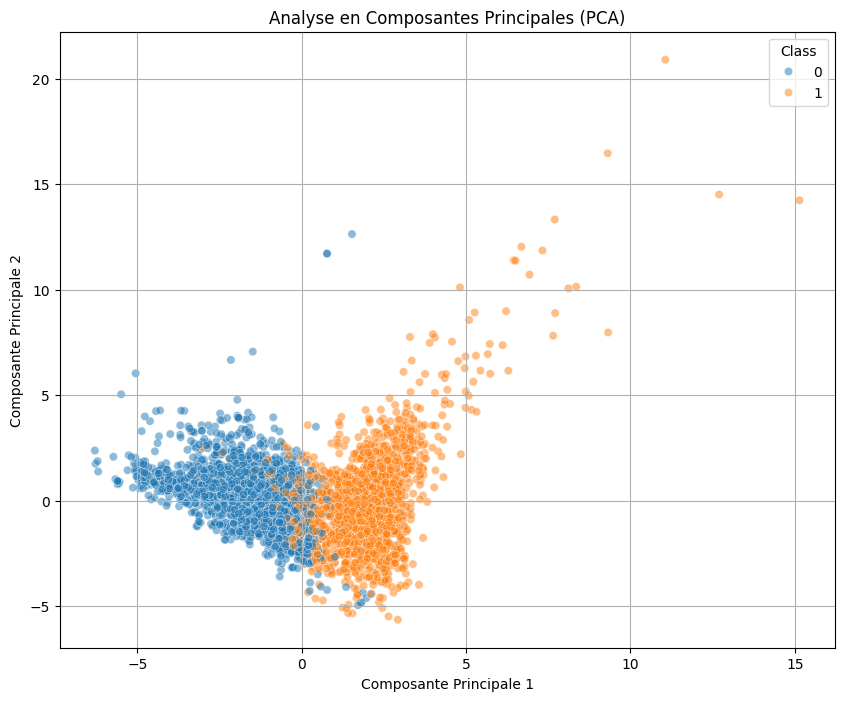

In [26]:
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    x=pcs[:, 0],
    y=pcs[:, 1],
    hue="Class",
    data=brain_tumor_labels,
    alpha=0.5  # Transparence

)
scatter.set_xlabel('Composante Principale 1')
scatter.set_ylabel('Composante Principale 2')
scatter.set_title('Analyse en Composantes Principales (PCA)')

plt.grid(True)


# ACP zoom

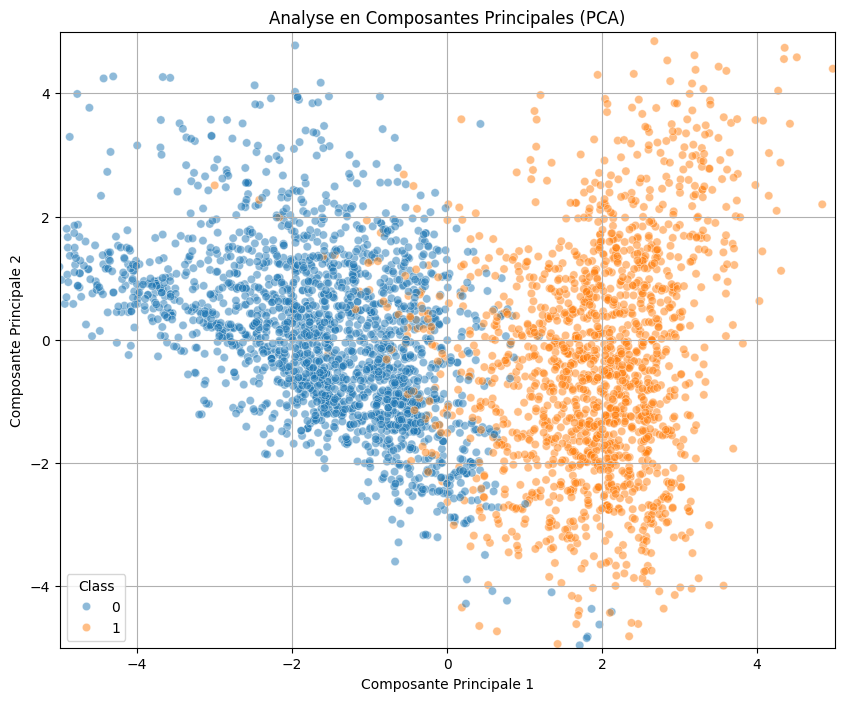

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    x=pcs[:, 0],
    y=pcs[:, 1],
    hue="Class",
    data=brain_tumor_labels,
    alpha=0.5  # Transparence
)

scatter.set_xlabel('Composante Principale 1')
scatter.set_ylabel('Composante Principale 2')
scatter.set_title('Analyse en Composantes Principales (PCA)')

# Définir les limites des axes pour zoomer
scatter.set_xlim(-5, 5)
scatter.set_ylim(-5, 5)

plt.grid(True)
plt.show()


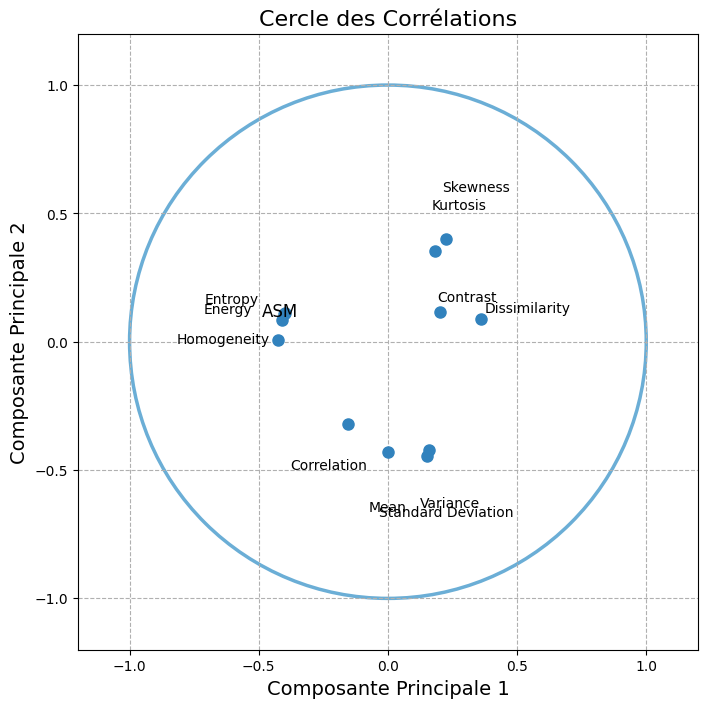

In [28]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Suppose cls is your PCA object with the components loaded
loadings = cls.components_.T

# Création du cercle de corrélation
fig, ax = plt.subplots(figsize=(8, 8))
# Utilisation d'une couleur de cercle en bleu clair avec une bordure plus épaisse
circle = plt.Circle((0, 0), 1, fill=False, color='#6BAED6', linewidth=2.5)
ax.add_artist(circle)

# Ajout des points et des labels
for i in range(len(loadings)):
    label = brain_tumor.columns[i]
    ax.plot(loadings[i, 0], loadings[i, 1], 'o', color='#3182BD', markersize=8)  # Points en bleu
    # Ajustement des positions des labels pour les variables spécifiques
    if label == 'variance':
        plt.text(loadings[i, 0] * 1.7, loadings[i, 1] * 1.7, label, color='black', ha='center', va='center', fontsize=12, fontweight='bold')
    elif label == 'mean':
        plt.text(loadings[i, 0] * 1.25, loadings[i, 1] * 1.25, label, color='black', ha='center', va='center', fontsize=12, fontweight='bold')
    elif label == 'standard deviation':
        plt.text(loadings[i, 0] * 1.8, loadings[i, 1] * 1.8, label, color='black', ha='center', va='center', fontsize=12, fontweight='bold')
    elif label == 'ASM':
        plt.text(loadings[i, 0] * 1.05, loadings[i, 1] * 1.05, label, color='black', ha='center', va='center', fontsize=12)
    elif label == 'entropy':
        plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, label, color='black', ha='center', va='center', fontsize=12)
    elif label == 'energy':
        plt.text(loadings[i, 0] * 1.3, loadings[i, 1] * 1.3, label, color='black', ha='center', va='center', fontsize=12)
    else:
        plt.text(loadings[i, 0] * 1.5, loadings[i, 1] * 1.5, label, color='black', ha='center', va='center', fontsize=10)

# Définition des limites et des étiquettes
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel('Composante Principale 1', fontsize=14)
ax.set_ylabel('Composante Principale 2', fontsize=14)
ax.set_title('Cercle des Corrélations', fontsize=16)

# Affichage du graphique avec grille en pointillés
plt.grid(True, linestyle='--')
plt.show()

In [29]:
pip install adjustText

## Kmeans

In [30]:
def kmeans_dataset(dataset, n_clusters_list, strategies, tries):
  for n_clusters in n_clusters_list:
    for strategy in strategies:
      for rs in range(tries):
        inertia = (KMeans(n_clusters=n_clusters,n_init=1,random_state=rs,init=strategy,).fit(dataset).inertia_)
        yield rs, strategy, n_clusters, inertia

<ipython-input-31-930d8d5a5626>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


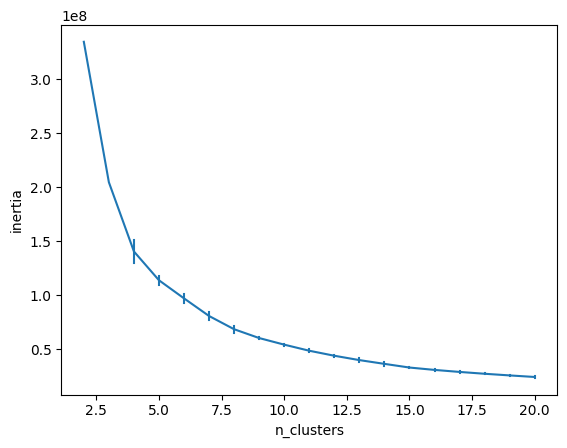

In [31]:
from sklearn.cluster import KMeans

gen = kmeans_dataset(brain_tumor_labels.iloc[:, 1:], range(2, 21), ["k-means++"], 20)
df = pd.DataFrame(gen, columns=["seed", "init", "n_clusters","inertia"])
sns.lineplot(
x="n_clusters",
y="inertia",
data=df.loc[df.init == "k-means++"],
err_style="bars",
ci="sd",
)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

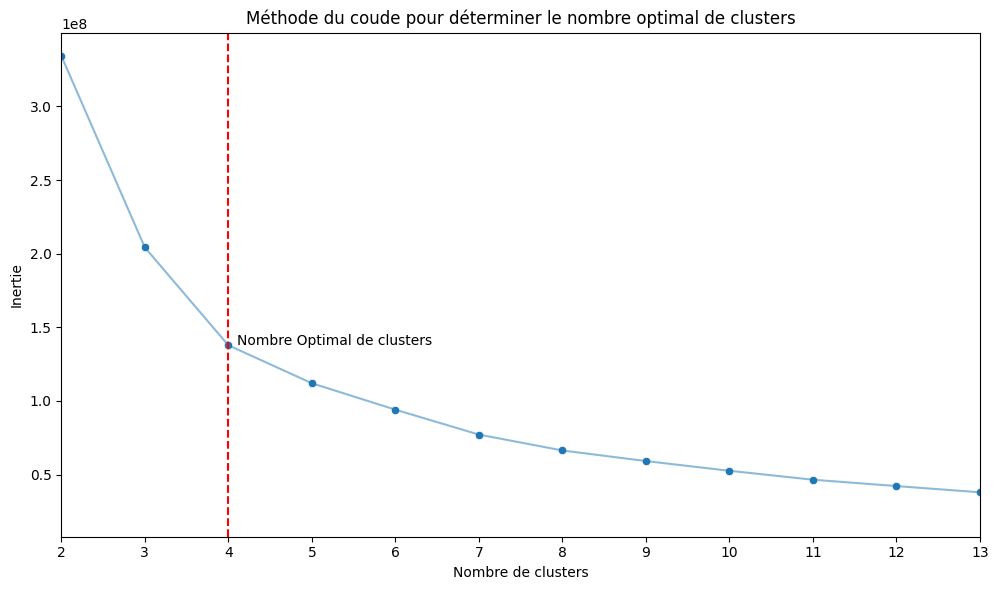

In [32]:
brain_tumor_data = brain_tumor_labels.iloc[:, 1:]

# Initialisation des listes pour stocker les résultats
seeds = []
inits = []
clusters = []
inertias = []

# Itération sur différents nombres de clusters
for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=20)
    kmeans.fit(brain_tumor_data)
    seeds.append(20)
    inits.append("k-means++")
    clusters.append(n_clusters)
    inertias.append(kmeans.inertia_)

# Création d'un DataFrame à partir des résultats
df = pd.DataFrame({
    "seed": seeds,
    "init": inits,
    "n_clusters": clusters,
    "inertia": inertias
})

# Tracer la courbe du coude avec des points individuels
plt.figure(figsize=(10, 6))
sns.scatterplot(x="n_clusters", y="inertia", data=df.loc[df.init == "k-means++"])
sns.lineplot(x="n_clusters", y="inertia", data=df.loc[df.init == "k-means++"], alpha=0.5)

# Trouver le nombre optimal de clusters
knee = df[df.init == "k-means++"]["inertia"].diff().diff().idxmax() + 2
plt.axvline(x=knee, color='red', linestyle='--')
plt.text(knee+0.1, df[df.init == "k-means++"]["inertia"].iloc[knee-2], 'Nombre Optimal de clusters', rotation=0)

plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.xticks(range(2, 21))
plt.tight_layout()
plt.xlim(2, 13)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


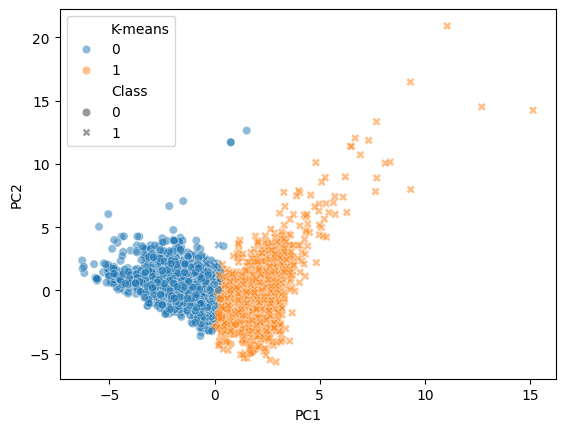

In [33]:
from sklearn.cluster import KMeans
from utils import *


pcs_df = pd.DataFrame(pcs, columns=[f'PC{i+1}' for i in range(pcs.shape[1])])
cls = KMeans(n_clusters=2, init='k-means++')
cls.fit(pcs_df)

labels = pd.Series(cls.labels_, name="K-means")
scatterplot_pca(data=pcs_df, hue=labels, style=brain_tumor_labels['Class'],alpha=0.5)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


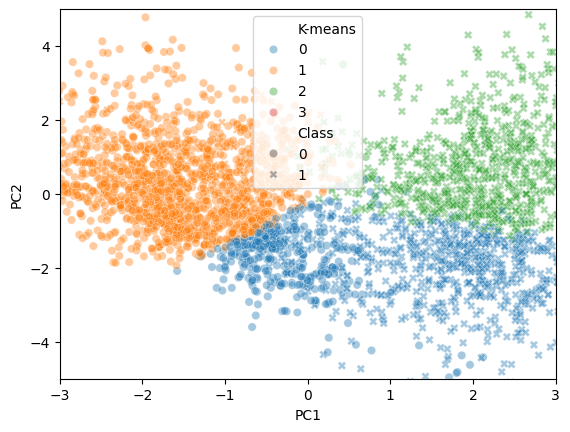

In [34]:

pcs_df = pd.DataFrame(pcs, columns=[f'PC{i+1}' for i in range(pcs.shape[1])])

# Configuration et ajustement de K-means
cls = KMeans(n_clusters=4, init='k-means++')
cls.fit(pcs_df)
labels = pd.Series(cls.labels_, name="K-means")

scatterplot_pca(data=pcs_df, hue=labels, style=brain_tumor_labels['Class'],alpha=0.4)

plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.show()


#METHODE 2

In [35]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
inertias = []
silhouettes = []
K = range(2, 10)
df = brain_tumor_labels
df_numeric = df.select_dtypes(include=[np.number])
df_numeric = df_numeric.drop(['Class'], axis=1)
scaler = StandardScaler()
df_normelized = scaler.fit_transform(df_numeric)


for k in K:
  kmeanModel = KMeans(n_clusters=k, random_state = 42)
  kmeanModel.fit(df_normelized)
  inertias.append(kmeanModel.inertia_)
  silhouettes.append(silhouette_score(df_normelized, kmeanModel.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [36]:
brain_tumor

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation
0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939
1,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834
2,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014
3,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189
4,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789
...,...,...,...,...,...,...,...,...,...,...,...,...
3757,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972
3758,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749
3759,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181
3760,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898


<ipython-input-37-08acc8a930e5>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


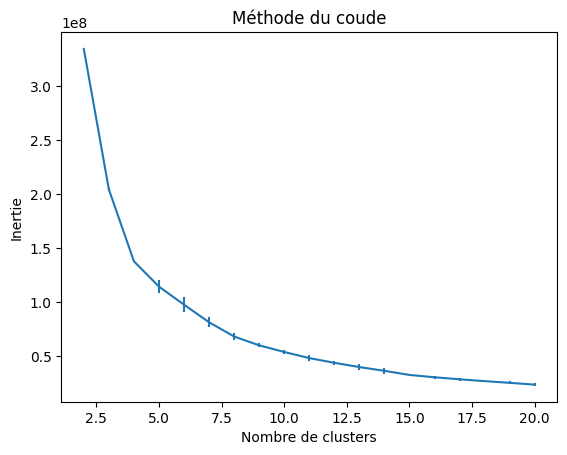

In [37]:
def kmeans_dataset(dataset, n_clusters_list, strategies, tries):
  for n_clusters in n_clusters_list:
          for strategy in strategies:
              for rs in range(tries):  # 'rs' will be used to set the `random_state`
                  inertia = (
                      KMeans(
                          n_clusters=n_clusters,
                          n_init=1,
                          random_state=rs,
                          init=strategy,
                      )
                      .fit(dataset)
                      .inertia_
                  )
                  yield rs, strategy, n_clusters, inertia


gen = kmeans_dataset(brain_tumor, range(2, 21), ["k-means++"], 10)
df = pd.DataFrame(gen, columns=["seed", "init", "n_clusters", "inertia"])
sns.lineplot(
    x="n_clusters",
    y="inertia",
    data=df.loc[df.init == "k-means++"],
    err_style="bars",
    ci="sd",
)

plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


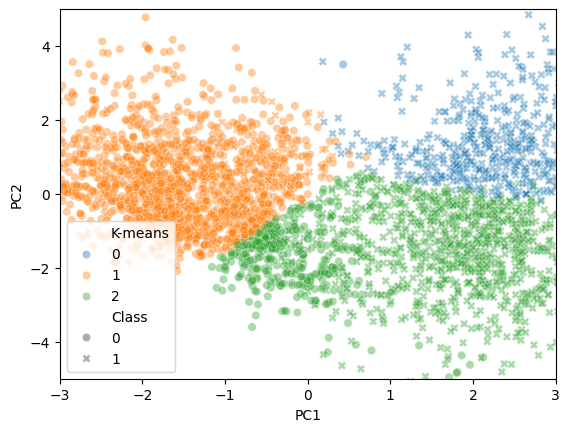

In [38]:
pcs_df = pd.DataFrame(pcs, columns=[f'PC{i+1}' for i in range(pcs.shape[1])])

# Configuration et ajustement de K-means
cls = KMeans(n_clusters=3, init='k-means++')
cls.fit(pcs_df)

labels = pd.Series(cls.labels_, name="K-means")

scatterplot_pca(data=pcs_df, hue=labels, style=brain_tumor_labels['Class'],alpha=0.4)

# Zoom sur le graphique
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.show()

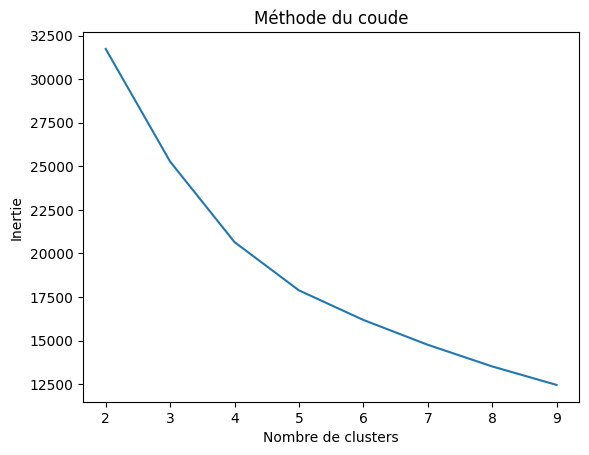

In [39]:
# Tracer la courbe de l'inertie en fonction du nombre de clusters
plt.plot(range(2, 10), inertias)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

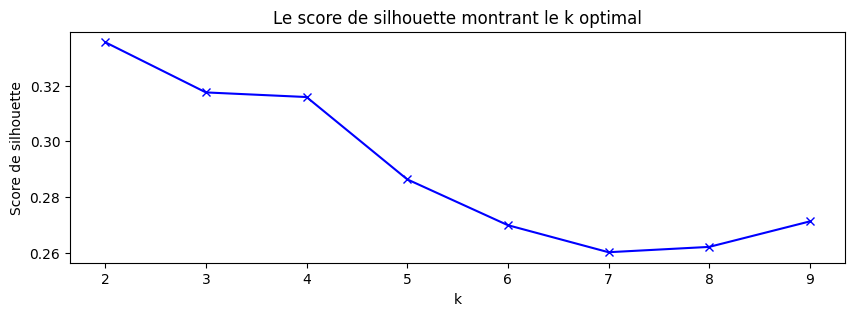

In [40]:
# Graphique du score de silhouette
plt.figure(figsize=(10,3))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.title('Le score de silhouette montrant le k optimal')
plt.show()

In [41]:
# Appliquer KMeans avec le nombre de clusters optimal trouvé (supposons que c'est 3 pour cet exemple)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_normelized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

## Pour quantifier la précision : Indice de Rand

In [42]:
from sklearn.metrics import adjusted_rand_score


pcs_df = pd.DataFrame(pcs, columns=[f'PC{i+1}' for i in range(pcs.shape[1])])

# Configuration et ajustement de K-means
cls = KMeans(n_clusters=4, init='k-means++')
cls.fit(pcs_df)

ari = adjusted_rand_score(brain_tumor_labels['Class'], cls.labels_)
print(f"L'indice de Rand ajusté est : {ari * 100} %")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


L'indice de Rand ajusté est : 49.8613686358812 %


# K plus proches voisins

In [43]:
pcs_1_2_df = pcs_df[['PC1', 'PC2']]
pcs_1_2_df

,PC1,PC2
0,-1.134947,0.116539
1,-4.262143,-0.049437
2,2.481383,-1.111446
3,3.074085,-0.235259
4,-0.900927,0.311275
...,...,...
3757,0.321001,-2.161311
3758,0.205905,-2.131569
3759,0.203598,-1.775664
3760,0.273145,-0.655034


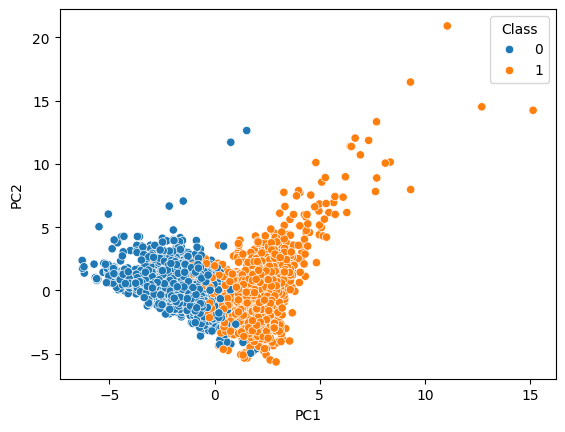

In [44]:

X = pcs_1_2_df
y = brain_tumor_labels['Class']

plot_clustering(X, y)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


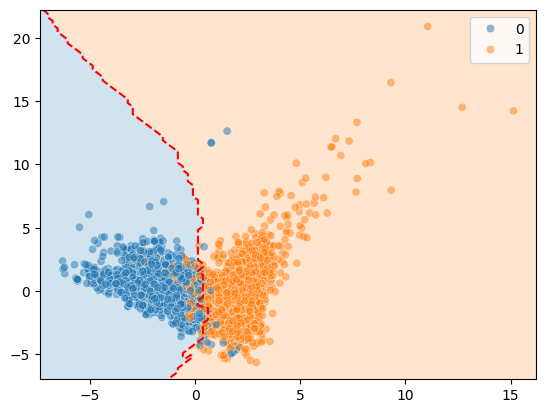

In [45]:
from sklearn.neighbors import KNeighborsClassifier

cls = KNeighborsClassifier(n_neighbors=25)
cls.fit(X, y)
scatter = sns.scatterplot(
    x=pcs[:, 0],
    y=pcs[:, 1],
    hue="Class",
    data=brain_tumor_labels,
    alpha=0.5  # Transparence

)
add_decision_boundary(cls)

plt.show()

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(cls, X, y, cv=5)
scores.mean()

0.9553435195388659

In [47]:
from sklearn.model_selection import GridSearchCV

n_neighbors_list = np.unique(np.round(np.geomspace(1, 500, 100)).astype(int))
param_grid = {"n_neighbors": n_neighbors_list}

cls = KNeighborsClassifier()
search = GridSearchCV(cls, param_grid, scoring="accuracy", cv=10)
search.fit(X, y)
search.best_params_


{'n_neighbors': 25}



# Théorie baysienne + Analyse discriminante

In [48]:
from scipy.stats import shapiro

for column in brain_tumor.columns:
    # Vérifier si la colonne contient des données numériques
    if pd.api.types.is_numeric_dtype(brain_tumor[column]):
        # Appliquer le test de Shapiro-Wilk
        stat, p = shapiro(brain_tumor[column])
        print(f'Test de normalité pour {column}:')
        print('Statistiques=%.3f, p-value=%.3f' % (stat, p))

        # Interprétation
        if p > 0.05:
            print("L'hypothèse de normalité ne peut pas être rejetée\n")
        else:
            print("L'hypothèse de normalité est rejetée\n")
    else:
        print(f'{column} est ignorée car non-numérique\n')

Test de normalité pour Mean:
Statistiques=0.955, p-value=0.000
L'hypothèse de normalité est rejetée

Test de normalité pour Variance:
Statistiques=0.930, p-value=0.000
L'hypothèse de normalité est rejetée

Test de normalité pour Standard Deviation:
Statistiques=0.997, p-value=0.000
L'hypothèse de normalité est rejetée

Test de normalité pour Entropy:
Statistiques=0.885, p-value=0.000
L'hypothèse de normalité est rejetée

Test de normalité pour Skewness:
Statistiques=0.640, p-value=0.000
L'hypothèse de normalité est rejetée

Test de normalité pour Kurtosis:
Statistiques=0.273, p-value=0.000
L'hypothèse de normalité est rejetée

Test de normalité pour Contrast:
Statistiques=0.578, p-value=0.000
L'hypothèse de normalité est rejetée

Test de normalité pour Energy:
Statistiques=0.933, p-value=0.000
L'hypothèse de normalité est rejetée

Test de normalité pour ASM:
Statistiques=0.872, p-value=0.000
L'hypothèse de normalité est rejetée

Test de normalité pour Homogeneity:
Statistiques=0.963, p

Donc on ne peut pas faire d'analyse discriminante

# Régression logistique

In [49]:
y = brain_tumor_labels['Class']

Scores d'accuracy pour chaque fold :  0.9547990337256289


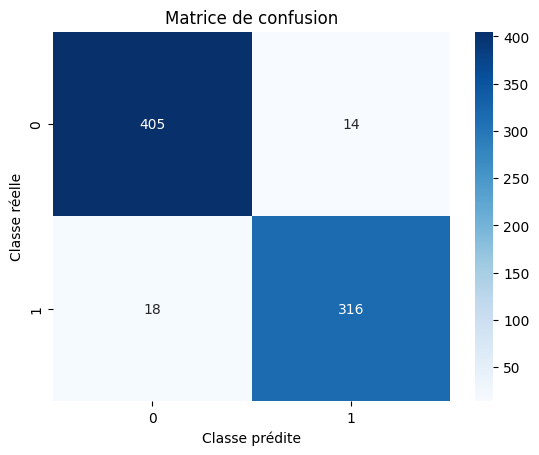

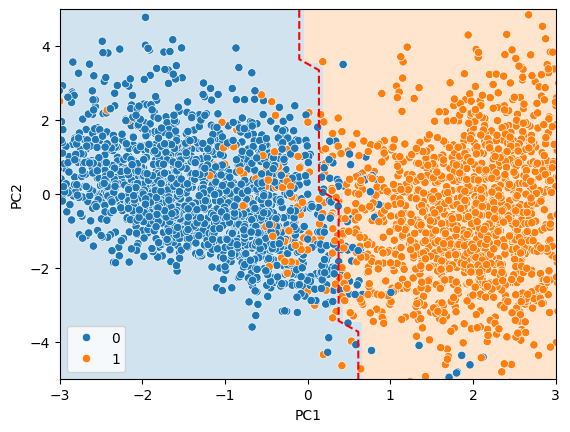

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Suppose `X` is the feature matrix and `y` is the target variable
X_train, X_test, y_train, y_test = train_test_split(normalized_df, y, test_size=0.2, random_state=42)

# Create a pipeline that scales the data and then applies logistic regression
pipeline = Pipeline([
    ('pca', PCA(n_components=2)),  # Adjust the number of components as needed
    ('logistic', LogisticRegression())
])

# Perform cross-validation and compute accuracy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

# Display the accuracy scores
print("Scores d'accuracy pour chaque fold : ", accuracy_scores.mean())


# Fit the pipeline on the entire training set and predict on the test set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.show()


# If `X` and `y` are defined for another context, make sure to redefine or remove these lines
X = pcs_1_2_df
y = brain_tumor_labels['Class']

plot_clustering(X, y)
add_decision_boundary(pipeline.named_steps['logistic'])
# Zoom sur le graphique
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.show()

In [51]:
# Access the logistic regression model within the pipeline
logistic_model = pipeline.named_steps['logistic']

n_components = 2  # Adjust based on your requirements

# Afficher les coefficients de régression
coefficients = pd.DataFrame(logistic_model.coef_.flatten(), index=[f'PC{i+1}' for i in range(n_components)], columns=['Coefficient'])
print(coefficients)


     Coefficient
PC1     2.949473
PC2     0.196293


In [52]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ajout d'une constante pour le calcul des VIF
X_with_const = sm.add_constant(X)

# Calcul des VIF
vif = pd.DataFrame()
vif["Variable"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif)


  Variable  VIF
0    const  1.0
1      PC1  1.0
2      PC2  1.0


In [53]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import numpy as np

# Définir le pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('logistic', LogisticRegression(penalty='l1', solver='saga', max_iter=10000))
])

# Utiliser StratifiedKFold pour maintenir la proportion des classes dans chaque fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calculer les scores de validation croisée
scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='roc_auc')

# Afficher les résultats
print("Scores pour chaque fold: ", scores)
print("Score moyen: ", np.mean(scores))


Scores pour chaque fold:  [0.98819723 0.99113119 0.99132084 0.99418786 0.97645228]
Score moyen:  0.9882578807588885


In [54]:
# Former le modèle sur l'ensemble d'entraînement complet
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('logistic',
                 LogisticRegression(max_iter=10000, penalty='l1',
                                    solver='saga'))])

# Arbre de décision


Accuracy: 0.9468556244464128
Confusion Matrix:
 [[606  26]
 [ 34 463]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       632
           1       0.95      0.93      0.94       497

    accuracy                           0.95      1129
   macro avg       0.95      0.95      0.95      1129
weighted avg       0.95      0.95      0.95      1129



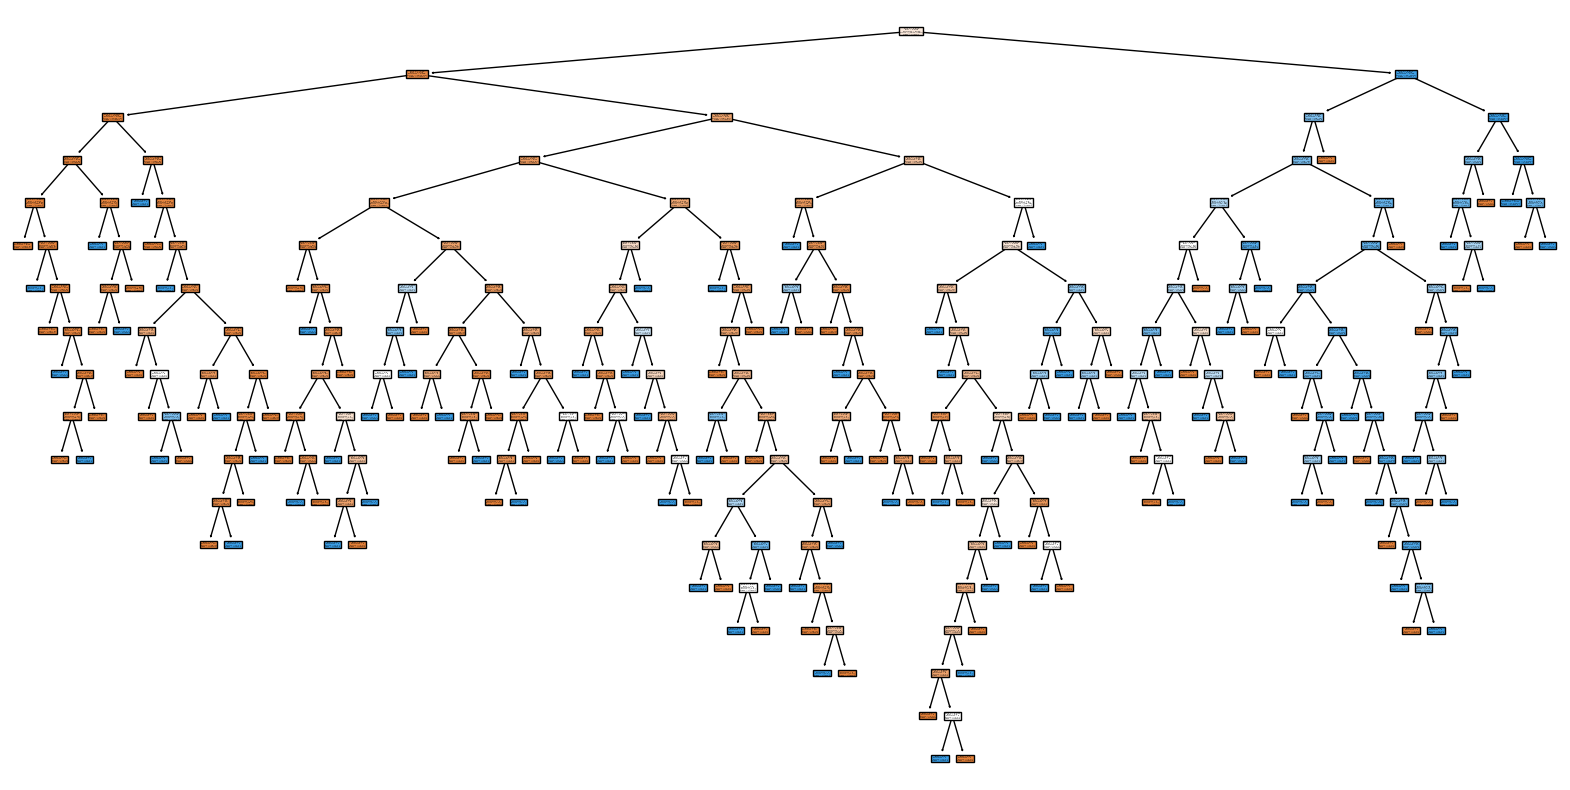

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

X = pcs_1_2_df
y = brain_tumor_labels['Class']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialisation et entraînement du modèle d'arbre de décision
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisation de l'arbre de décision
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.show()


Accuracy: 0.9565987599645704
Confusion Matrix:
 [[612  20]
 [ 29 468]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       632
           1       0.96      0.94      0.95       497

    accuracy                           0.96      1129
   macro avg       0.96      0.96      0.96      1129
weighted avg       0.96      0.96      0.96      1129



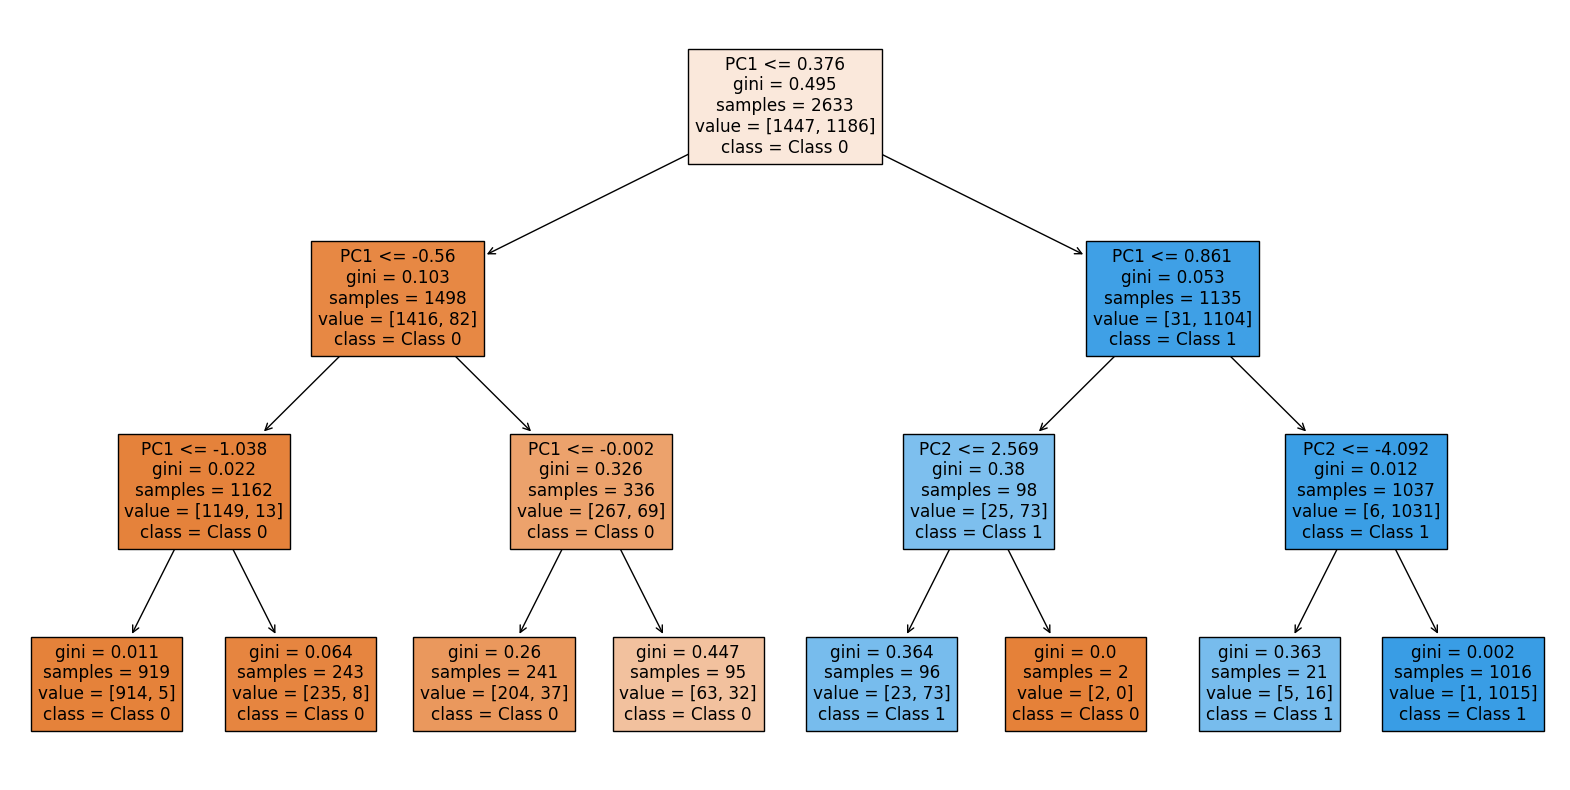

In [56]:
import matplotlib.pyplot as plt
from sklearn import tree

# Limiter la profondeur de l'arbre pour le rendre plus condensé
model = DecisionTreeClassifier(max_depth=3, random_state=42)  # Ajustez la profondeur selon vos besoins
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisation de l'arbre de décision
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.show()


In [57]:
from sklearn.model_selection import GridSearchCV

# Configuration de la grille de paramètres
param_grid = {'max_depth': range(1, 20)}  # Tester les profondeurs de 1 à 10

# Initialisation et configuration de la validation croisée
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Récupération des meilleurs paramètres
best_depth = grid_search.best_params_['max_depth']
print(f"La meilleure profondeur d'arbre trouvée est : {best_depth}")


La meilleure profondeur d'arbre trouvée est : 1


In [58]:

# Tester différentes profondeurs d'arbre
depths = [1, 2, 3, 4, 5]
cross_val_scores = []
test_scores = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)

    # Validation croisée sur l'ensemble d'entraînement
    cv_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    cross_val_scores.append(cv_score)

    # Ajustement du modèle sur l'ensemble d'entraînement complet
    clf.fit(X_train, y_train)

    # Évaluation sur l'ensemble de test
    test_score = clf.score(X_test, y_test)
    test_scores.append(test_score)

# Afficher les résultats
for depth, cv_score, test_score in zip(depths, cross_val_scores, test_scores):
    print(f"Profondeur: {depth}, Score de validation croisée: {cv_score:.4f}, Score sur l'ensemble de test: {test_score:.4f}")

Profondeur: 1, Score de validation croisée: 0.9544, Score sur l'ensemble de test: 0.9557
Profondeur: 2, Score de validation croisée: 0.9544, Score sur l'ensemble de test: 0.9557
Profondeur: 3, Score de validation croisée: 0.9537, Score sur l'ensemble de test: 0.9566
Profondeur: 4, Score de validation croisée: 0.9529, Score sur l'ensemble de test: 0.9566
Profondeur: 5, Score de validation croisée: 0.9514, Score sur l'ensemble de test: 0.9522


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


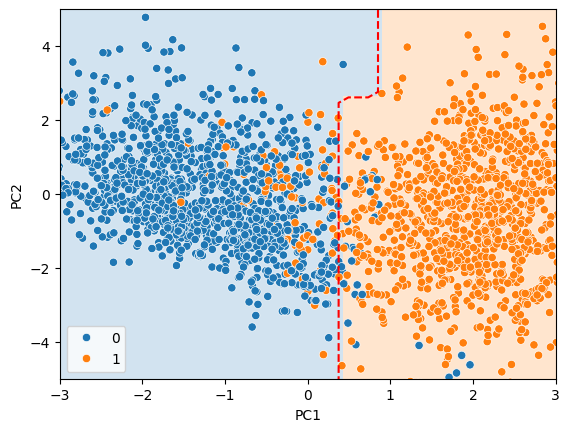

In [59]:
plot_clustering(X_train, y_train)
add_decision_boundary(model)
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.show()

à priori on ne peux pas car notre variable de prédiction est binaire
